## Imports

In [ ]:
import torch
from torch import nn, optim
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

## Data

In [39]:
transform = transforms.ToTensor()

In [40]:
train_data = datasets.MNIST(root='data', download=True, train=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

In [41]:
train_loader = DataLoader(dataset=train_data, batch_size=20)
test_loader = DataLoader(dataset=test_data, batch_size=20)

## Model

In [42]:
class MnistAutoEncoder(nn.Module):

    def __init__(self, encode_dim):
        super().__init__()

        self.encode_dim = encode_dim
        self.encoder = nn.Linear(in_features=784, out_features=encode_dim)
        self.decoder = nn.Linear(in_features=encode_dim, out_features=784)

    def forward(self, x):
        x = torch.relu(self.encoder(x))
        x = torch.sigmoid(self.decoder(x))

        return x

In [45]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [46]:
model = MnistAutoEncoder(20).to(device)

## Train

In [47]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
EPOCHS = 100

In [48]:
for epoch in range(EPOCHS):

    train_loss = 0.0

    for image, label in train_loader:
        
        image = image.view(image.size(0), -1).to(device)

        pred = model(image)
        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            loss = criterion(pred, image)
            loss.backward()
            optimizer.step()
    
    train_loss += loss.item()
    print(f'Epoch{epoch}: loss={loss}')
            



Epoch0: loss=0.03210153430700302
Epoch1: loss=0.027296055108308792
Epoch2: loss=0.026285558938980103
Epoch3: loss=0.02600827068090439
Epoch4: loss=0.025849461555480957
Epoch5: loss=0.025696048513054848
Epoch6: loss=0.02555791661143303
Epoch7: loss=0.025422414764761925
Epoch8: loss=0.025298215448856354
Epoch9: loss=0.025184420868754387
Epoch10: loss=0.025092313066124916
Epoch11: loss=0.02500275894999504
Epoch12: loss=0.024926140904426575
Epoch13: loss=0.024857904762029648
Epoch14: loss=0.024749843403697014
Epoch15: loss=0.024685639888048172
Epoch16: loss=0.024639567360281944
Epoch17: loss=0.02458971180021763
Epoch18: loss=0.02454366721212864
Epoch19: loss=0.024504901841282845
Epoch20: loss=0.02445281483232975
Epoch21: loss=0.02440723590552807
Epoch22: loss=0.024368032813072205
Epoch23: loss=0.024327490478754044
Epoch24: loss=0.024256067350506783
Epoch25: loss=0.024212734773755074
Epoch26: loss=0.024169333279132843
Epoch27: loss=0.02413700893521309
Epoch28: loss=0.024109726771712303
Epoc

## Results

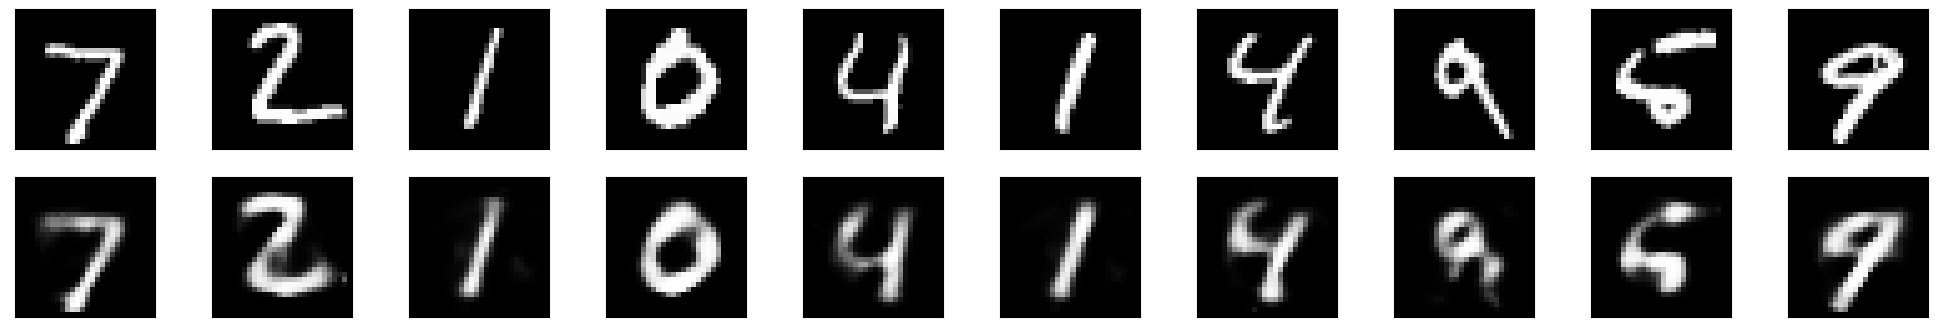

In [61]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)

images_flatten = images.view(images.size(0), -1)

output = model(images_flatten)

images = images.detach().cpu().numpy()

output = output.view(20, 1, 28, 28)

output = output.detach().cpu().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)